# Classical Part
We study the following system
$$  H(q,p) = \frac{1}{2}p^2 + q^4  + a q^2 + b q~. $$

Firstly, we plotted the surface formed by the $x$ values that satisfy $\frac{d V(x)}{dx} = 0$ as a function of parameters $a$ and $b$. The inflection points (satisfying $\frac{d^2 V(x)}{dx^2} = 0$) are drawn in red. (It is notorious that $V(x) = x^4 + ax^2 + b x$.)


In [51]:
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo

# Definimos una función para encontrar las raíces de la ecuación cúbica
def find_roots(a, b):
    coeffs = [4, 0, 2*a, b]
    return np.roots(coeffs)

# Definimos una función para encontrar los puntos de inflexión
def find_inflexion_points(a_values):
    inflexion_points = []
    for a in a_values:
        x_inflexion = np.sqrt(-a / 6)
        x_inflexion_neg = -np.sqrt(-a / 6)
        b_inflexion = -4 * x_inflexion**3 - 2 * a * x_inflexion
        b_inflexion_neg = -4 * x_inflexion_neg**3 - 2 * a * x_inflexion_neg
        inflexion_points.append((a, b_inflexion, x_inflexion))
        inflexion_points.append((a, b_inflexion_neg, x_inflexion_neg))
    return inflexion_points

# Definimos los rangos de a y b
a_values = np.linspace(-10, 10, 50)
b_values = np.linspace(-10, 10, 50)
A, B = np.meshgrid(a_values, b_values)

# Inicializamos listas para almacenar los valores de a, b y las raíces
A_list = []
B_list = []
X_list = []

# Calculamos las raíces para cada combinación de a y b
for a in a_values:
    for b in b_values:
        roots = find_roots(a, b)
        for root in roots:
            if np.isreal(root):  # Solo tomamos las raíces reales
                A_list.append(a)
                B_list.append(b)
                X_list.append(np.real(root))

# Encontramos los puntos de inflexión
a_values2 = np.linspace(-7, 0, 50)
inflexion_points = find_inflexion_points(a_values2)
A_inflexion, B_inflexion, X_inflexion = zip(*inflexion_points)

# Creamos la figura y los ejes 3D
fig = go.Figure()

# Añadimos los puntos de las raíces reales
fig.add_trace(go.Scatter3d(
    x=A_list,
    y=B_list,
    z=X_list,
    mode='markers',
    marker=dict(
        size=3,
        color=X_list,
        colorscale='Viridis',
        opacity=0.8
    ),
    name='Raíces reales'
))

# Añadimos los puntos de inflexión
fig.add_trace(go.Scatter3d(
    x=A_inflexion,
    y=B_inflexion,
    z=X_inflexion,
    mode='markers',
    marker=dict(
        size=2,
        color='red',
        opacity=0.9
    ),
    name='Puntos de inflexión'
))

# Añadimos etiquetas a los ejes con mayor tamaño
fig.update_layout(
    scene=dict(
        xaxis=dict(
            title='a',
            titlefont=dict(size=20),  # Tamaño de la etiqueta del eje x
            tickfont=dict(size=16)    # Tamaño de los números en el eje x
        ),
        yaxis=dict(
            title='b',
            titlefont=dict(size=20),  # Tamaño de la etiqueta del eje y
            tickfont=dict(size=16)    # Tamaño de los números en el eje y
        ),
        zaxis=dict(
            title='x',
            titlefont=dict(size=20),  # Tamaño de la etiqueta del eje z
            tickfont=dict(size=16)    # Tamaño de los números en el eje z
        )
    ),
    title='Superficie de raíces reales y puntos de inflexión'
)

# Mostramos la gráfica interactiva
pyo.plot(fig)


'temp-plot.html'

# Phase Space

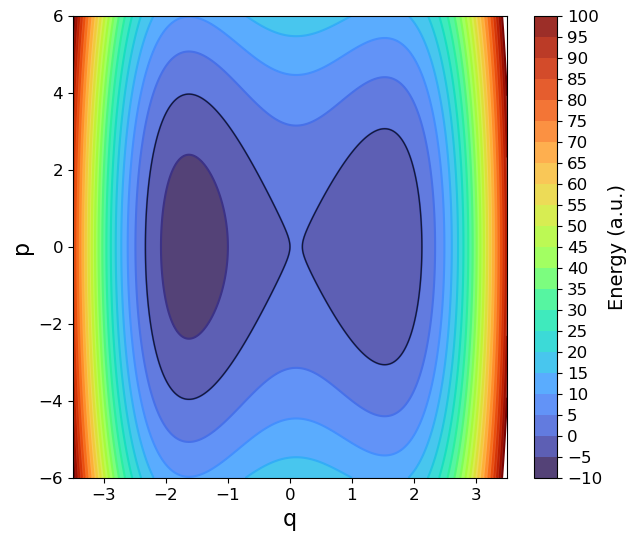

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos los parámetros
a1 = 1 
a2 = -5

# Definimos el Hamiltoniano
def hamiltonian(q, p):
    return 0.5 * p**2 + q**4 + a1 * q + a2 * q**2

# Generamos una malla de puntos en el espacio de fases
q = np.linspace(-3.5, 3.5, 400)
p = np.linspace(-6, 6, 400)
Q, P = np.meshgrid(q, p)

# Calculamos las energías en cada punto de la malla
H = hamiltonian(Q, P)

# Definimos los niveles para los contornos
levels = np.linspace(-10, 100, 23)

# Dibujamos las curvas de energía en el espacio de fases
plt.figure(figsize=(7, 6))

# Contornos de energía
contours = plt.contour(Q, P, H, levels=levels, cmap='turbo')

# Contorno lleno
contour_filled = plt.contourf(Q, P, H, levels=levels, cmap='turbo', alpha=0.85)

# Añadir el contorno negro en el nivel de energía 0
plt.contour(Q, P, H, levels=[0], colors='k', linewidths=1, alpha=0.7)

# Barra de color con etiqueta ajustada
cbar = plt.colorbar(contour_filled, ticks=levels)
cbar.set_label('Energy (a.u.)', fontsize=14)  # Tamaño de la etiqueta de la barra de color
cbar.ax.tick_params(labelsize=12)  # Tamaño de los números en la barra de color

# Etiquetas de los ejes con tamaño ajustado
plt.xlabel('q', fontsize=16)
plt.ylabel('p', fontsize=16)

# Ajuste del tamaño de los números de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar la gráfica
plt.show()



# Phase diagram of quartic potential. Configuration of the three critical points

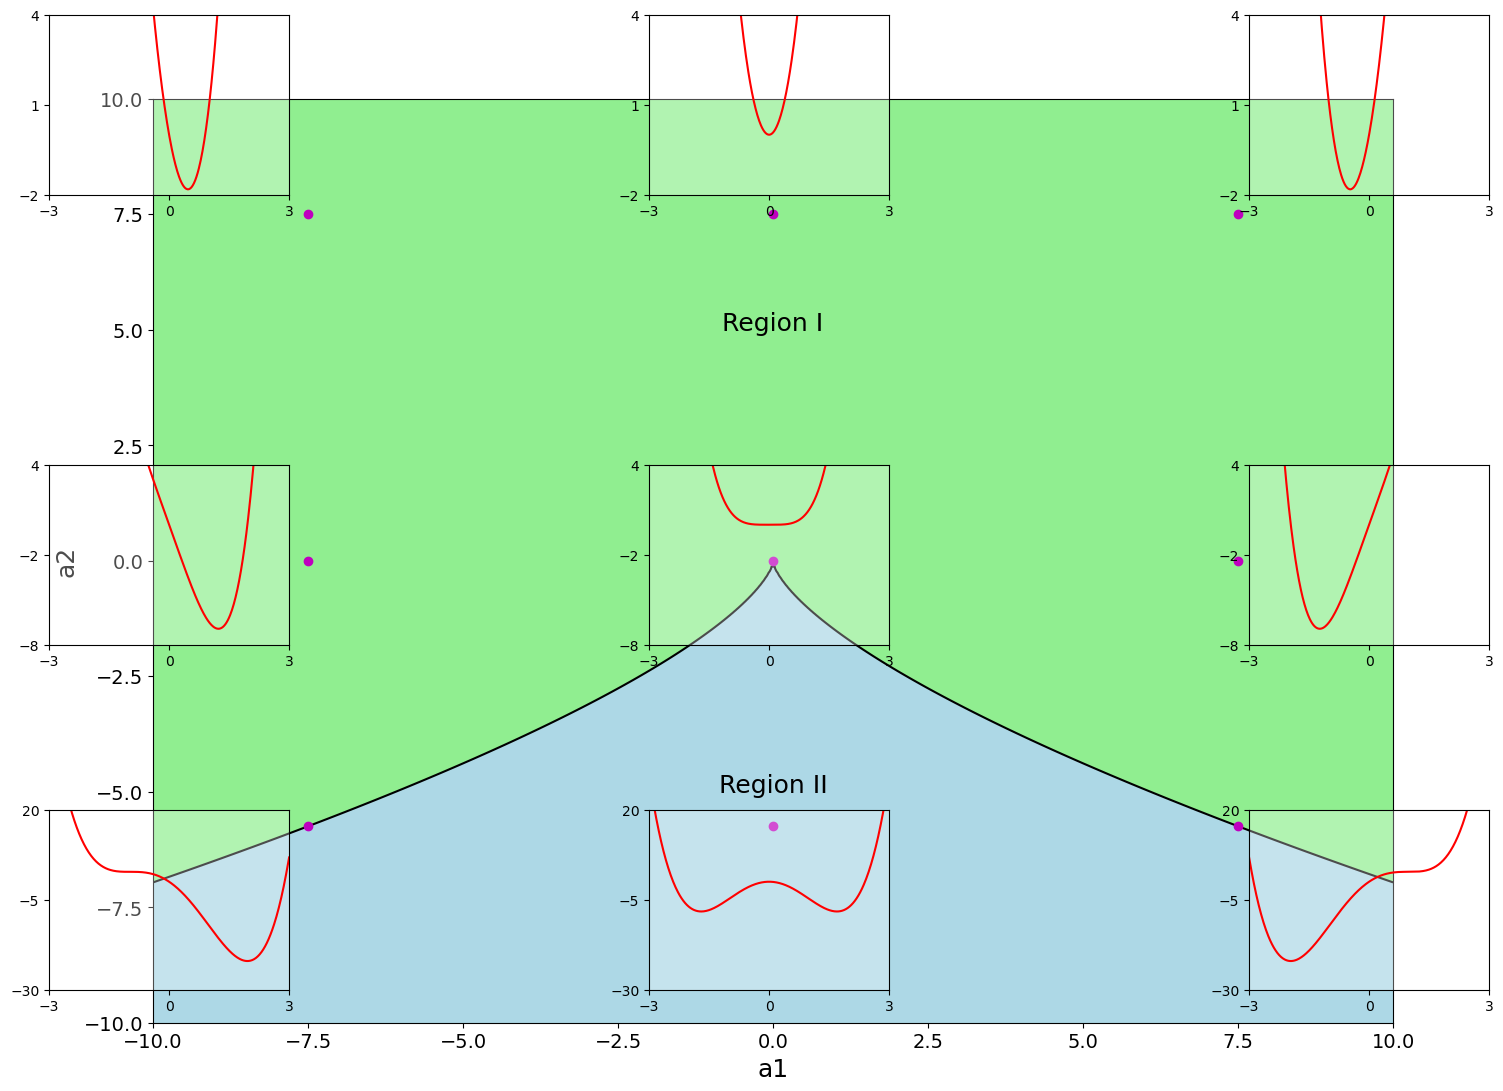

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of a1 and a2
a1 = np.linspace(-10, 10, 400)
a2 = np.linspace(-10, 10, 400)
a1, a2 = np.meshgrid(a1, a2)

# Calculate the function value
z = 27 * a1**2 + 8 * a2**3

# Function to plot potential V(x) with title and axes, with color change and specific ranges
def plot_potential(ax, a1, a2, y_range):
    x = np.linspace(-3, 3, 400)
    V = x**4 + a2 * x**2 + a1 * x
    ax.plot(x, V, color='red')
    ax.set_xlim(-3, 3)
    ax.set_ylim(y_range)
    ax.patch.set_alpha(0.3)  # Make background semi-transparent
    ax.set_facecolor((1, 1, 1, 0.3))  # White semi-transparent background
    ax.set_xticks([-3, 0, 3])
    ax.set_yticks([y_range[0], (y_range[0] + y_range[1]) / 2, y_range[1]])
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

# Coordinates for inset plots
positions = [
    (-7.5, 7.5),
    (0, 7.5),
    (7.5, 7.5),
    (-7.5, 0),
    (0, 0),
    (7.5, 0),
    (-7.5, -5.75),
    (0, -5.75),
    (7.5, -5.75)
]

# Define y-axis ranges for different groups
y_ranges = [
    (-2, 4), (-2, 4), (-2, 4), 
    (-8, 4), (-8, 4), (-8, 4), 
    (-30, 20), (-30, 20), (-30, 20)
]

# Plot the main contour and regions
fig, ax_main = plt.subplots(figsize=(16, 12))
contour = ax_main.contour(a1, a2, z, levels=[0], colors='black')
ax_main.contourf(a1, a2, z, levels=[-np.inf, 0, np.inf], colors=['lightblue', 'lightgreen'])
ax_main.text(0, 5, 'Region I', fontsize=18, ha='center')
ax_main.text(0, -5, 'Region II', fontsize=18, ha='center')
ax_main.set_xlabel('a1', fontsize=18)
ax_main.set_ylabel('a2', fontsize=18)
ax_main.tick_params(axis='both', which='major', labelsize=14)
ax_main.grid(False)

# Add points and inset plots with specific y-ranges and background, slightly moved to the right
for pos, y_range in zip(positions, y_ranges):
    a1_val, a2_val = pos
    ax_main.plot(a1_val, a2_val, 'mo')  # Add points
    inset_size = 0.15  # Adjusted size for overlay
    ax_inset = fig.add_axes([0, 0, inset_size, inset_size], anchor='C', transform=ax_main.transAxes)
    ax_inset.set_position([(a1_val + 10) / 20 - inset_size/2 + 0.01, (a2_val + 10) / 20 - inset_size/2, inset_size, inset_size])
    plot_potential(ax_inset, a1_val, a2_val, y_range)

plt.show()


# Quantum Part
In this part we study the following dimensionless Hamiltonian
$$\hat{\cal H} = \frac{4P^2}{K} + X^4 + B_3\, X^3+ B_2\, X^2 + B_1\, X~, $$
where we define some of the variables and control parameters as:

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_hermite
from scipy.integrate import quad

# Set the values for the parameters
n = 12 #Basis dim. that we want to calculate
B1 = 0
B2 = -5
B3 = 0
k = 40
xi = np.sqrt(2)
deltaN = 20
deltaE = 1e-1


This Hamiltonian can be written in second quantization formalism
\begin{align}
  \hat{\cal H} =& E_0 + \left( \frac{4}{K\xi^2} + 3 \xi^4 + B_2 \xi^2 \right) \hat{n} + \frac{3\xi^4}{2} {a^\dagger}^2 a^2 \nonumber\\
&\quad + \left(\frac{B_1 \xi}{\sqrt{2}}+ \frac{3 B_3 \xi^3}{2\sqrt{2}}\right) (a^\dagger + a) + \frac{B_3 \xi^3}{2\sqrt{2}} (3 {a^\dagger}^2 a + 3 a^\dagger a^2) \nonumber\\
&\quad + \left(\frac{-4 K^{-1} \xi^{-2} + 3 \xi^4 + B_2 \xi^2}{2}\right) ({a^\dagger}^2 + a^2) + \xi^4 (a^\dagger a^3 + {a^\dagger}^3 a)  \nonumber\\
&\quad + \frac{B_3 \xi^3}{2\sqrt{2}} ({a^\dagger}^3 + a^3)  \nonumber\\
&\quad + \frac{\xi^4}{4} ({a^\dagger}^4 + a^4)~, 
\end{align}
where the zero-point energy is $E_0 = \frac{2}{K\xi^2} +\frac{3\xi^4}{4} + \frac{B_2\xi^2}{2}$.

This expression of the Hamiltonian allows us to build its associated matrix in Fock space, whose non-zero elements are

\begin{align}
\langle n| \hat {\cal H} | n\rangle &= \left(\frac{4}{K \xi^2} + 3\xi^4 + B_2 \xi^2\right) n + \frac{3\xi^4}{2} n(n - 1) + \frac{2}{K\xi^2} +\frac{3\xi^4}{4} + \frac{B_2\xi^2}{2} \label{eq:matrix1}\\
\langle n| \hat {\cal H} | n-1\rangle &= \left( \frac{B_1 \xi}{\sqrt{2}} + \frac{3B_3 \xi^3}{2\sqrt{2}}n \right) \sqrt{n} \\
\langle n| \hat {\cal H} | n-2\rangle &= \left( \frac{-4K^{-1}\xi^{-2} + B_2\xi^2 + \xi^4(2n-1)  }{2} \right) \sqrt{n(n-1)} \\
\langle n| \hat {\cal H} | n-3\rangle &= \frac{B_3 \xi^3}{2\sqrt{2}} \sqrt{n (n - 1) (n-2)} \\
\langle n| \hat {\cal H} | n-4\rangle &= \frac{\xi^4}{4} \sqrt{ n (n-1) (n-2) (n - 3)}~. \label{eq:matrix4}
\end{align}

# Hamiltonian matrix

In [54]:
def hamiltonian_matrix(N, B1, B2, B3, k, xi):
    """
    Generates the Hamiltonian matrix for a given set of parameters.

    Inputs:
    N: number of energy levels 
    B1: first-order anharmonicity coefficient 
    B2: second-order anharmonicity coefficient 
    B3: third-order anharmonicity coefficient 
    k: unitless parameter in the kinetic term (default 1)
    xi: unitless oscillator length (default 1)

    Returns:
    Sub-diagonal Hamiltonian matrix of shape (N, N)
    """
    
    # Initialize the matrix with zeros
    H = np.zeros((N, N))
    
    n = np.arange(N)

    # Calculate the main diagonal
    cte1 = 4 / k  * xi ** -2 + 3 * xi ** 4 + B2 * xi ** 2
    cte2 = 1.5 * xi ** 4 * n * (n - 1)
    diag0 = cte1 * n + cte2 + (4 / k * xi ** -2 + 1.5 * xi ** 4 + B2 * xi ** 2) / 2
    
    # Calculate the first subdiagonal
    cte3 = B1 * xi + 1.5 * B3 * xi ** 3
    cte4 = 3 * xi ** 3 * B3 / np.sqrt(8)
    diag1 =  np.sqrt(2) * np.sqrt(n[1:]) * cte3 + cte4 * (n[1:] - 1) * np.sqrt(n[1:])

    # Calculate the second subdiagonal
    ct5 = -2 / k * xi ** -2 + 1.5 * xi ** 4 + B2 * xi ** 2 / 2
    ct6 = xi ** 4 * (n[2:] - 2) * np.sqrt(n[2:] * (n[2:] - 1))
    diag2 = np.sqrt(n[2:] * (n[2:] - 1)) * ct5 + ct6

    # Calculate the third subdiagona
    diag3 = (xi ** 3 * B3 * np.sqrt(n[3:] * (n[3:] - 1) * (n[3:] - 2))) / np.sqrt(8)

    # Calculate the fourth subdiagonal
    diag4 = 0.25 * xi ** 4 * np.sqrt(n[4:] * (n[4:] - 1) * (n[4:] - 2) * (n[4:] - 3))

    # Assign the calculated values to the matrix
    np.fill_diagonal(H, diag0)
    np.fill_diagonal(H[1:,:], diag1)
    np.fill_diagonal(H[2:,:], diag2)
    np.fill_diagonal(H[3:,:], diag3)
    np.fill_diagonal(H[4:,:], diag4)

    return H

# Convergence Analysis

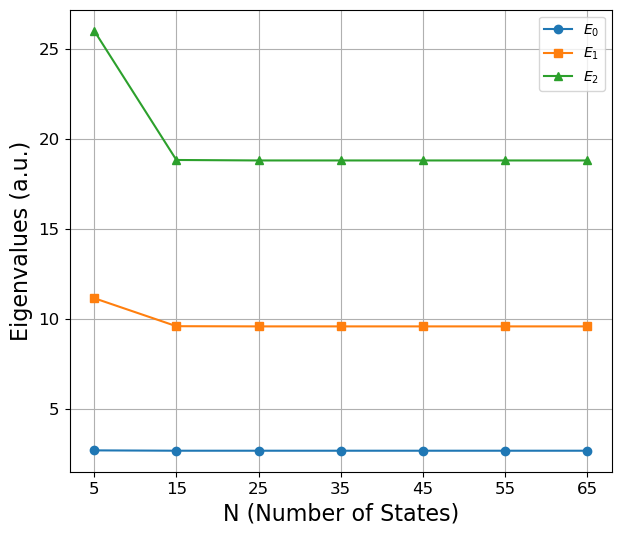

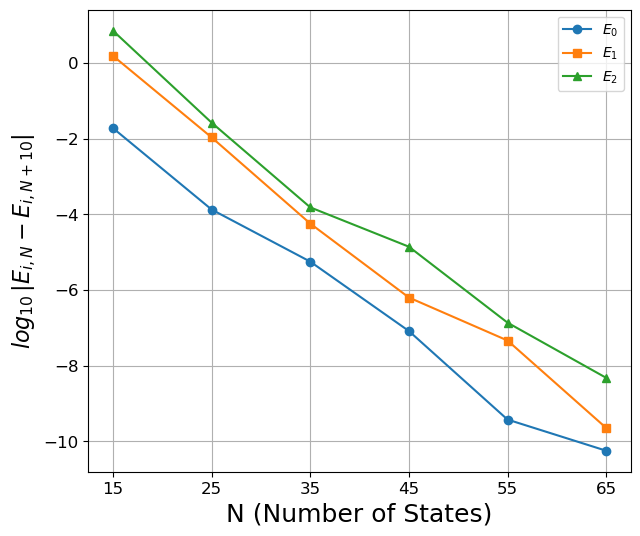

In [50]:
# Parameters
B1 = 0
B2 = 0
B3 = 0
k = 1
xi = np.sqrt(2)

# Range of N values
N_values = np.arange(5, 75, 10)

# Lists to store eigenvalues
E0 = []
E1 = []
E2 = []

# Compute eigenvalues for each N
for N in N_values:
    H = hamiltonian_matrix(N, B1, B2, B3, k, xi)
    eigvals, eigvecs = np.linalg.eigh(H)
    E0.append(eigvals[0])
    E1.append(eigvals[1])
    E2.append(eigvals[2])

# Plotting the eigenvalues
plt.figure(figsize=(7, 6))
plt.plot(N_values, E0, 'o-', label=r'$E_0$')
plt.plot(N_values, E1, 's-', label=r'$E_1$')
plt.plot(N_values, E2, '^-', label=r'$E_2$')
plt.xlabel('N (Number of States)', fontsize=16)
plt.ylabel('Eigenvalues (a.u.)', fontsize=16)
plt.xticks(np.arange(5, 75, 10), fontsize=12)
plt.yticks( fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Compute the differences between successive eigenvalues
diff_E0 = np.diff(E0)
diff_E1 = np.diff(E1)
diff_E2 = np.diff(E2)

# Plotting the differences in logarithmic scale
plt.figure(figsize=(7, 6))
plt.plot(N_values[1:], np.log10(np.abs(diff_E0)), 'o-', label='$E_0$')
plt.plot(N_values[1:], np.log10(np.abs(diff_E1)), 's-', label='$E_1$')
plt.plot(N_values[1:], np.log10(np.abs(diff_E2)), '^-', label='$E_2$')
plt.xlabel('N (Number of States)', fontsize=18)
plt.ylabel(r'$log_{10} \,|E_{i,N} -E_{i, N+10}|$', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(np.arange(15, 75, 10), fontsize=12)
plt.yticks( fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# Convergence Function

In [5]:
def convergence(M, B1, B2, B3, k, xi, deltaN, deltaE):
    '''
    Find the convergence of the eigenvalues and eigenvectors of the given Hamiltonian matrix.
    Inputs:
    M: number of states
    B1: first-order anharmonicity coefficient 
    B2: second-order anharmonicity coefficient 
    B3: third-order anharmonicity coefficient 
    k: unitless parameter in the kinetic term (default 1)
    xi: unitless oscillator length (default 1)
    deltaN: step in the basis dimension
    deltaE: energy convergence threshold
    Outputs:
    eigvals: converged eigenvalues for the given threshold
    eigvecs: converged eigenvectors
    Nfin: total number of the basis dimention after the steps
    '''
    N0 = M # initial basis dimension
    converged = False # this works like a semaphore
    eigvals_prev = np.zeros(M) # stores eigenvalues from previous diagonalization
    
    while not converged:
        # diagonalize the Hamiltonian matrix
        eigvals, eigvecs = np.linalg.eigh(hamiltonian_matrix(N0,B1,B2,B3,k,xi))
        
        # check convergence by comparing the first M eigenvalues from previous and current diagonalizations
        diff = np.abs(eigvals[:M] - eigvals_prev)
        max_diff = np.max(diff)
        
        if max_diff < deltaE:
            converged = True
        else:
            N0 += deltaN
            eigvals_prev = eigvals[:M]
            Nfin = N0
    
    # return converged eigenvalues and eigenstates
    return eigvals[:M], eigvecs[:, :M], Nfin

In [56]:
conv_eigvals, conv_eigvecs, Nfin = convergence(n,B1,B2,B3,k,xi,deltaN,deltaE)

In [57]:
print(conv_eigvals[1], Nfin)

-5.270994747344183 152


When the double well is symmetric, the states can be separeted based on parity

In [40]:
# separate the converged eigenvalues and eigenvectors based on parity (even)
conv_eigvals = conv_eigvals[::2]  # even parity
conv_eigvecs = conv_eigvecs[::2, ::2]  # even parity

In [6]:
# separate the converged eigenvalues and eigenvectors based on parity (odd)
conv_eigvals = conv_eigvals[1::2]  # odd parity
conv_eigvecs = conv_eigvecs[1::2, 1::2]  # odd parity

# to calculate the matrix elements  <x¹> , <x²> ... 

In [10]:
def position_expectation(eigvecs, xi):
    """
    Calculates the expectation value of the position x for a given set of eigenvectors.

    Inputs:
    conv_eigvecs: converged eigenvectors of shape (N, M)
    xi: unitless oscillator length parameter

    Returns:
    expectation value of x as a float
    """

    N, M = conv_eigvecs.shape
    
    #x_expect = np.zeros(M)
    x_hat = xi*np.sqrt(1/(2)) * (np.diag(np.sqrt(np.arange(0, N-1)+1), -1) + np.diag(np.sqrt(np.arange(1, N)), 1))
    x_expect = np.dot(conv_eigvecs.conj().T, np.dot(x_hat, conv_eigvecs))
    #x_expect = np.dot(np.dot(conv_eigvecs[:, i].conj().T,x_hat), conv_eigvecs[:, i])

    return x_expect

# Wave functions

In [11]:
def harmonic_oscillator_wf(x, n):
    """Calculate the nth energy level of the harmonic oscillator using scipy.special Hermite polynomials.
    Input: 
    x: position grid where the wavefunction is computed
    n: number of energy states
    Return: Value of phiHO calculated as sqrt(1/(2**n * factorial(n))) * pi**(-1/4) * exp(-x**2/2) * H(x,n)
    
    """
    return np.sqrt(1/(2**n * np.math.factorial(n))) * np.pi**(-1/4) * np.exp(-x**2/2) * eval_hermite(n,x)

or recursively

In [12]:
def hermite_rec(x, n):
    """Calculate the nth Hermite polynomial for an array of x values using recurrence.
    Input: 
    x: position grid where the wavefunction is computed
    n: number of energy states
    Return:
    H(n)(x) = 2*x * H(n-1)(x) - 2*(n-1) * H(n-2)(x)
    """
    if n == 0:
        return 1
    elif n == 1:
        return 2 * x
    else:
        return 2 * x * hermite_rec(x, n-1) - 2 * (n-1) * hermite_rec(x, n-2)


def HO_wf_rec(x, n):
    """Calculate the nth energy level of the harmonic oscillator but the hermite polynomials are calculated 
    using recurrence.
    Input: 
    x: position grid where the wavefunction is computed
    n: number of energy states
    Return:
    Value of phiHO calculated as sqrt(1/(2**n * factorial(n))) * pi**(-1/4) * exp(-x**2/2) * hermite_rec(x,n)
    """
    return np.sqrt(1/(2**n * np.math.factorial(n))) * np.pi**(-1/4) * np.exp(-x**2/2) * hermite_rec(x,n)

In [13]:
def pot(x, B1, B2, B3, xi):
    '''Calculate the quartic potetial for the given parameters.
    Input:
    x: position grid where the wavefunction is computed
    B1: first-order anharmonicity coefficient 
    B2: second-order anharmonicity coefficient 
    B3: third-order anharmonicity coefficient
    Return:
    Quartic potential caluculated as: V(x) = x**4 + B3*x**3 + B2*x**2 + B1*x
    '''
    return x**4 *xi**4 + B3*x**3 * xi**3 + B2*x**2 * xi**2 + B1*x * xi

In [14]:
def calculate_psi(n, eigvecs, x):
    """
    Calculate the wave function psi using the given eigenvectors and positions.
    
    Inputs:
    n: number of energy states or number of wave functions to calculate.
    eigvecs: array of eigenvectors (obtained from the convergence function).
    x: position grid where the wavefunction is computed
    
    Outputs:
    psi: array of wave function values.
    """
    # Truncar eigvecs si tiene más de 250 filas
    if len(eigvecs[:, 0]) > 250:
        eigvecs = eigvecs[:250, :] 
    
    psi_values = []
    
    for i in range(n):
        psi = np.zeros(len(x))
        
        for j in range(len(eigvecs[:,0])):
            psi += eigvecs[j][i] * harmonic_oscillator_wf(x, j)
            #psi += eigvecs[j][i] * HO_wf_rec(x, j)
        
        psi_values.append(psi)
    
    return psi_values


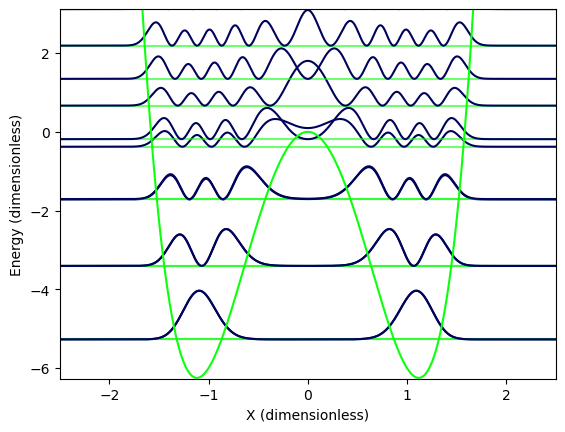

In [58]:
# these lines calculate psi as the sumatory of the product of the obtained eigenvectors for our 
#hamiltonian matrix by the harmonic oscillator wavefunc. as well as the propability and plot it for every 
#energy level 


dx = 0.001
x = np.arange(-2.5, 2.5, dx)
En = conv_eigvals[:]
psi = calculate_psi(n,conv_eigvecs,x)
# Convert psi to a NumPy array
psi = np.array(psi)

for i in range(n):
    # Plot the wavefunction
    plt.axhline(En[i], c='xkcd:neon green', alpha=0.6)
    plt.plot(x, En[i] + psi[i,:]**2, c='xkcd:dark blue')
        
    
V = pot(x,B1,B2,B3, xi)
plt.plot(x, V, c='xkcd:neon green')
plt.xlim(-2.5, 2.5)
plt.ylim(min(En)-1,max(En))
plt.xlabel('X (dimensionless)')
plt.ylabel('Energy (dimensionless)')    
#plt.title(f'|$\psi$|**2 n={n} quartic potential')
#plt.legend()
plt.show()

# Inverse participation ratio (IPR)
$$\text{PR} = \frac{1}{\sum_i |c_i|^4}~,  $$


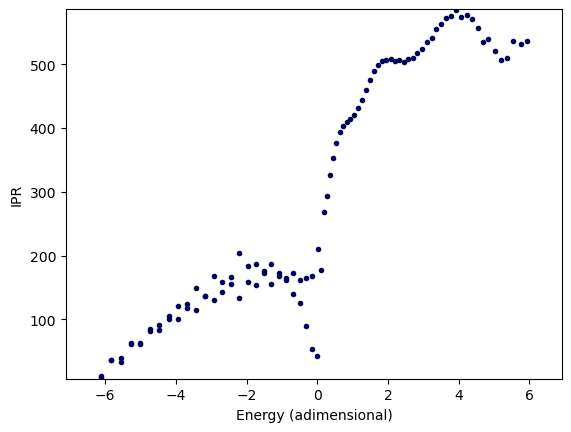

In [72]:
IPR = np.zeros(n)

for i in range(0,n):
        IPR[i] = 1 / np.sum(conv_eigvecs[:,i]**4)

# Plot the IPR
plt.plot(conv_eigvals[:n], IPR, '.', c='xkcd:dark blue')
plt.xlim(np.min(conv_eigvals[:n])-1, np.max(conv_eigvals[:n])+1)
plt.ylim(np.min(IPR)-1, np.max(IPR)+1)
plt.xlabel('Energy (dimensionless)')
plt.ylabel('IPR (a.u.)')
#plt.title(f'IPR n={n} quartic potential')
plt.show()

In [57]:
IPR[:10]

array([ 1.33590872,  2.58321855,  5.3125181 ,  6.84200136,  9.15153523,
       11.26041236, 12.66190862, 15.60833723, 16.48231945, 19.49314788])

# QPTs and ESQPTS

In [59]:
M = n
xi = np.sqrt(2)
B1_range = np.linspace(-0.5, 0.5, 301)
B2_range = np.linspace(-1, 0.5, 301)

In [60]:
# compute the eigenvalues for each value of B1
eigvals_list = []
gs_list = []
for B1_val in B1_range:   
    # diagonalize the matrix and get the eigenvalues
    H = hamiltonian_matrix(2000,B1_val,-1,B3,10000,xi)
    eigvals, _ = np.linalg.eigh(H)
    eigvals_list.append(eigvals[:M])
    gs_list.append(eigvals[0])

# convert the list of eigenvalues to a 2D array for plotting
eigvals_arr = np.array(eigvals_list)
gs_arr = np.array(gs_list)

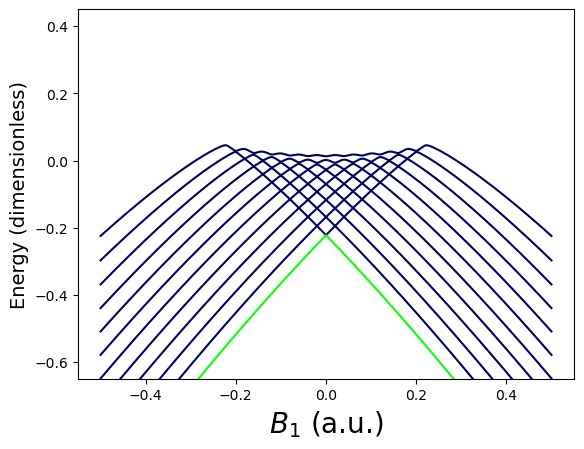

In [64]:
# plot the eigenvalues as a function of B1
for i in range(1,M):
    plt.plot(B1_range, eigvals_arr[:, i], c='xkcd:dark blue')

plt.plot(B1_range, gs_arr, c='xkcd:neon green')
plt.xlabel("$B_1$ (a.u.)", fontsize=20)
plt.ylabel("Energy (dimensionless)", fontsize=14)
#plt.ylim(np.min(eigvals_arr),np.max(eigvals_arr))
plt.ylim(-0.65,0.45)
plt.show()

In [65]:
# compute the eigenvalues for each value of B2
eigvals_list = []
gs_list = []
for B2_val in B2_range:   
    # diagonalize the matrix and get the eigenvalues
    H = hamiltonian_matrix(2000,0,B2_val,B3,6000,xi)
    eigvals, _ = np.linalg.eigh(H)
    eigvals_list.append(eigvals[:M])
    gs_list.append(eigvals[0])

# convert the list of eigenvalues to a 2D array for plotting
eigvals_B2_arr = np.array(eigvals_list)
gs_B2_arr = np.array(gs_list)

In [ ]:
# plot the eigenvalues as a function of B2
for i in range(1,M):
    plt.plot(B2_range, eigvals_B2_arr[:, i], c='xkcd:dark blue')

plt.plot(B2_range, gs_B2_arr, c='xkcd:neon green')
plt.xlabel("$B_2$ (a.u.)", fontsize=20)
plt.ylabel("Energy (dimentionless)")
#plt.ylim(np.min(eigvals_B2_arr),np.max(eigvals_B2_arr))
plt.ylim(-0.3,1)
plt.show()

# Derivatives

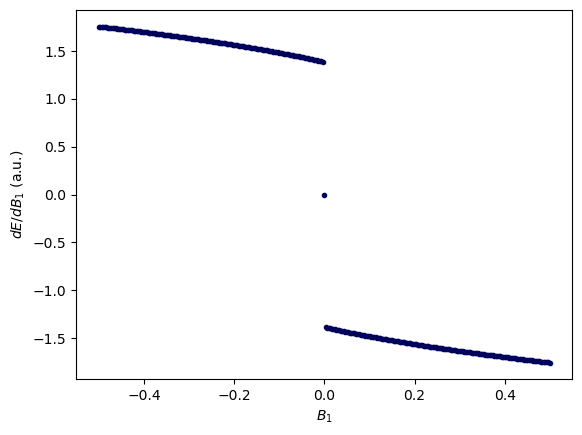

In [61]:
dE = np.gradient(gs_arr)
dB1 = np.gradient(B1_range)
deriv = dE/dB1 

# plot the derivative of the Energy of gs as a function of B1
plt.plot(B1_range, deriv, '.', c='xkcd:dark blue')
#plt.plot(B1_range, deriv, c='xkcd:deep purple', alpha=0.3)
plt.xlabel("$B_1$")
plt.ylabel("$dE/dB_1$ (a.u.)")
plt.show()

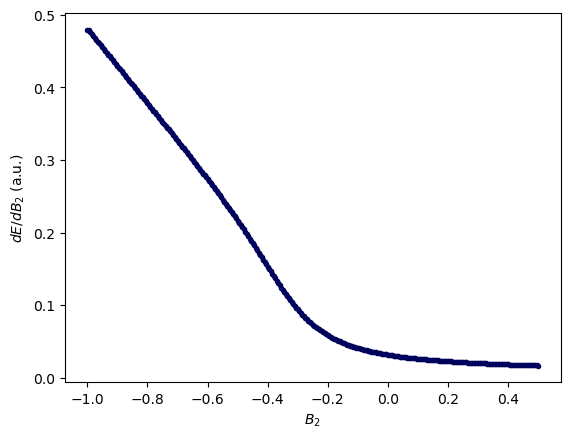

In [66]:
dE2 = np.gradient(gs_B2_arr)
dB2 = np.gradient(B2_range)
deriv2 = dE2/dB2

# plot the derivative of the Energy of gs as a function of B2
plt.plot(B2_range, deriv2, '.', c='xkcd:dark blue')
#plt.plot(B2_range, deriv2, c='xkcd:deep purple', alpha=0.3)
plt.xlabel("$B_2$")
plt.ylabel("$dE/dB_2$ (a.u.)")
plt.show()

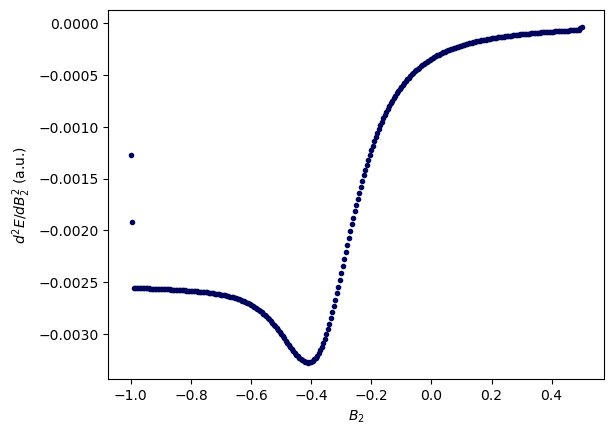

In [67]:
dderiv2 = np.gradient(deriv2)

# plot the eigenvalues as a function of B1
plt.plot(B2_range, dderiv2, '.', c='xkcd:dark blue')
#plt.plot(B2_range, dderiv2, c='xkcd:deep purple', alpha=0.3)
plt.xlabel("$B_2$")
plt.ylabel("$d^2E/dB_2^2$ (a.u.)")
plt.show()

# Density of states

In [68]:
def integral(x,B1,B2,B3,k,E):
    denominator = E - x**4 - B3*x**3 - B2*x**2 - B1*x
    #if np.any(denominator <= 0):
     #   return 0.0
    return (np.sqrt(k) / (8*np.pi)) * 1 / np.sqrt(np.abs(denominator))


def exact_density_of_states(B1,B2,B3,k,E):
    '''
    Calculates the exact density of states for a given energy doing the integral numerically.
    
    Inputs:
    B1: first-order anharmonicity coefficient.
    B2: second-order anharmonicity coefficient.
    B3: third-order anharmonicity coefficient.
    k: unitless parameter in the kinetic term
    E: (array of) energy (levels)
    
    Outputs:
    exact_density: array of the calculated extac density of states.
    
    ***It calls a function that i called integral where is the integrand that i want to calculate because this is the way the function quad works.***
    '''
    exact_density = np.zeros_like(E) 
    
    # Calculate the integral numerically using quad form scipy
    for i, energy in enumerate(E):
        result, error = quad(integral, -np.inf, np.inf, args=(B1, B2, B3, k, energy), limit=200)
        exact_density[i] = result
    
    return exact_density

In [65]:
def num_dos_LR(energies, avals, n_neigh=10):
    '''
    Computes the density of states for the eigenvalues avals in the energy interval energies.
    
    Input 
    energies   ....  Energy grid where dos is computed.
    avals      ....  Eigenvalue set
    n_neigh    ....  Number of neighboring levels considered. Default value 10
    
    Output
    dos        ....  DOS for E = energies
    
    For each e_i in energies, if possible, the n_neigh-th eigenvalues are taken to 
    the left (E_m) and to the right (E_M) of the eigenvalue that lies closest to 
    e_i, and the density is computed as (2*n_neigh+1)/(E_M-E_m).
    
    When close to edges, only the left or right neighbors are considered.
    '''
    
    dos = np.zeros_like(energies)
    dim = avals.shape[0]
    
    for index, energy in enumerate(energies):
        index_min = np.abs(avals - energy).argmin()
        Eclosest = avals[index_min]
        nneigh_left = index_min - n_neigh
        nneigh_right = index_min + n_neigh
        
        if nneigh_left < 0:
            nneigh_left = 0  # Set the left neighbor index to the first eigenvalue
            Enneigh_right = avals[nneigh_right]
            dos[index] = (n_neigh + 1) / np.abs(Enneigh_right - Eclosest)
        elif nneigh_right >= dim:
            nneigh_right = dim - 1  # Set the right neighbor index to the last eigenvalue
            Enneigh_left = avals[nneigh_left]
            dos[index] = (n_neigh + 1) / np.abs(Eclosest - Enneigh_left)
        else:
            Enneigh_right = avals[nneigh_right]
            Enneigh_left = avals[nneigh_left]
            dos[index] = (2 * n_neigh + 1) / np.abs(Enneigh_right - Enneigh_left)
    
    return dos

In [68]:
# Calculate energy levels
energies = np.linspace(np.min(conv_eigvals),np.max(conv_eigvals),M)
density = num_dos_LR(energies,conv_eigvals,10)
exact_density = exact_density_of_states(B1,B2,B3,k,energies)

/tmp/ipykernel_5373/422383307.py:28: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  result, error = quad(integral, -np.inf, np.inf, args=(B1, B2, B3, k, energy), limit=200)
/tmp/ipykernel_5373/422383307.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(k) / (8*np.pi)) * 1 / np.sqrt(np.abs(denominator))
/tmp/ipykernel_5373/422383307.py:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, error = quad(integral, -np.inf, np.inf, args=(B1, B2, B3, k, energy), limit=200)


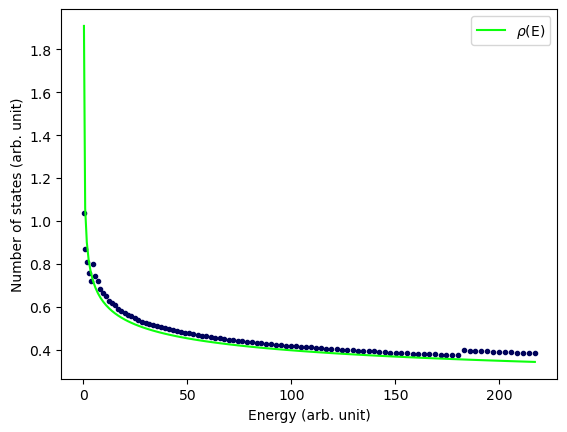

In [71]:
# plot the eigenvalues as a function of B1
plt.plot(conv_eigvals, density, '.', c='xkcd:dark blue')
plt.plot(conv_eigvals, exact_density, c='xkcd:neon green', label=r'$\rho$(E)')

plt.xlabel('Energy (adimensional)')
plt.ylabel("Number of states")
#plt.xlim(-0.5,20.5)
plt.legend()
plt.show()

# Quantum fidelity and susceptibility
$${\cal F}(\xi, \xi + \delta\xi) = |\langle \psi_0 (\xi) | \psi_0 (\xi + \delta\xi) \rangle|~,    $$
and
$$ {\cal S}(\xi) = \lim_{\delta\xi\to 0}\frac{2 (1 -  {\cal F}(\xi, \xi + \delta xi))}{\delta\xi^2}  $$


In [69]:
def fid_and_suscep(eigvec, eigvec_perturbed, deltaL):
    """
    Calculates the quantum fidelity for a given two eigenvectors and the aprox. susceptibility using the calculated fidelity.

    Inputs:
    eigvec: eigenvector.
    eigenvector: this is suppose to be the perturbed eigenvector.

    Returns:
    The quantum fidelity calculated as np.abs(np.vdot(eigvec1, eigvec2))**2
    The aproximated susceptibility calculated as 2*(1-F)/deltaL**2
    """
    F = (np.abs(np.vdot(eigvec, eigvec_perturbed)))**2
    sus = 2*(1-F)/deltaL**2
    return F, sus

In [70]:
# Parameters
M = 50    # Number of states
k = 10000
B1_range = np.linspace(-2, 2, 101)  # Range of B1 values to plot
deltaB1 = 0.001  # Small perturbation in B1

In [71]:
fidelities = []  # Store the calculated fidelities and susceptibilities
susceptibilities = []
# Calculate the quantum fidelity for each B1 value
for B1_val in B1_range:
    # Calculate eigenvectors with original B1
    H_orig = hamiltonian_matrix(1920,B1_val,B2,B3,k,np.sqrt(2)) 
    eigvals_orig, eigvecs_orig = np.linalg.eigh(H_orig)
    gs_orig = eigvecs_orig[:, 0]  
    
    # Calculate eigenvectors with perturbed B1
    H_per = hamiltonian_matrix(1920,B1_val + deltaB1,B2,B3,k,np.sqrt(2))
    eigvals_perturbed, eigvecs_perturbed = np.linalg.eigh(H_per)
    gs_perturbed = eigvecs_perturbed[:, 0]  
    
    # Calculate fidelity and susceptibility
    fidelity, susceptibility = fid_and_suscep(gs_orig, gs_perturbed, deltaB1)
    fidelities.append(fidelity)
    susceptibilities.append(susceptibility)

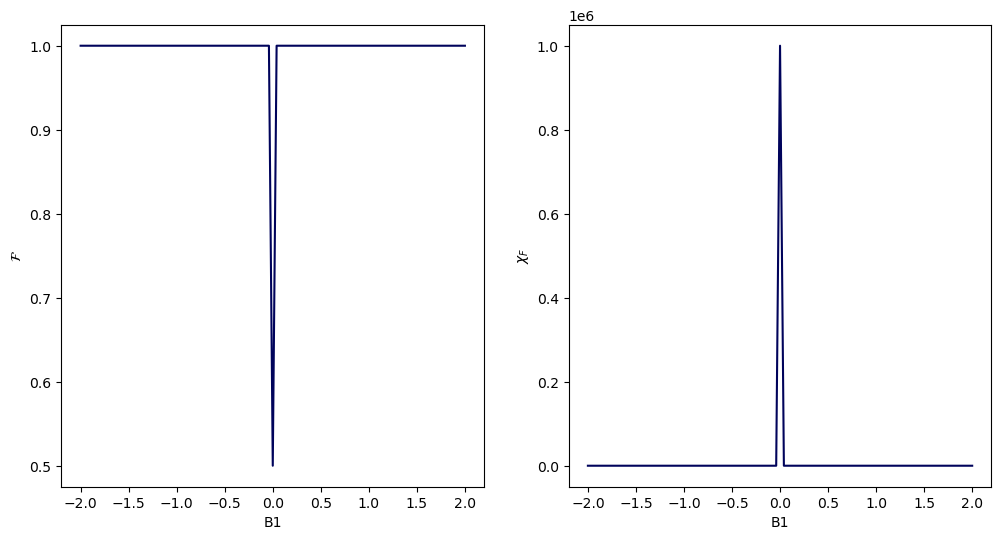

In [72]:
# Plot density of states as a function of energy level
figure, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(B1_range, fidelities, c='xkcd:dark blue')
ax[0].set_xlabel('B1')
ax[0].set_ylabel('$\mathcal{F}$')
#ax[0].set_ylim(0.99995,1.00005)

    
ax[1].plot(B1_range, susceptibilities, c='xkcd:dark blue')
ax[1].set_xlabel('B1')
ax[1].set_ylabel('$\chi_F$')
    
plt.show()

exact susceptibility as
$$ {\cal S}(\xi) = \sum_{n \neq 0} \frac{|\langle \psi_n(\xi)|H_I|\psi_0(\xi)\rangle|^2}{[E_n(\xi) - E_0(\xi)]^2} $$

In [320]:
# Parameters
M = 50    # Number of states
k = 10000
B1_range = np.linspace(-2, 2, 101)  # Range of B1 values to plot

suscept2 = []
# Calculate 
for B1_val in B1_range:
    # Calculate 
    Ho = hamiltonian_matrix(1920,B1_val,B2,B3,k,np.sqrt(2)) 
    eigvals, eigvecs = np.linalg.eigh(Ho)
    eigvec_gs = eigvecs[:, 0]
    energy_gs = eigvals[0]

    x = np.linspace(-5,5, len(eigvec_gs))
    
    vec = x * eigvec_gs 
    
    chi_F = 0.0
    for i in range(1,len(x)):
        num = (np.abs(np.vdot(eigvecs[:,i],vec)))**2
        den = (eigvals[i]-energy_gs)**2
        chi_F += num/den
        
    suscept2.append(chi_F)

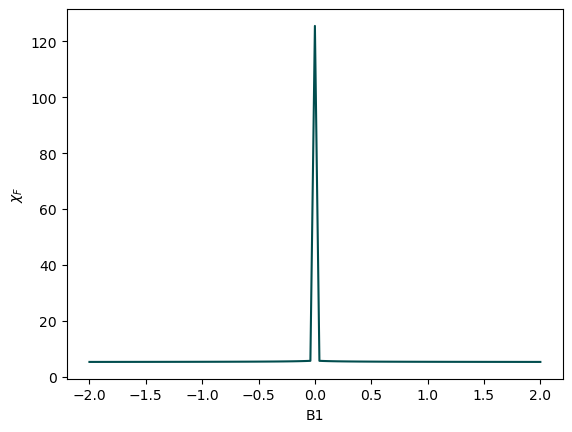

In [322]:
plt.plot(B1_range, suscept2, c='xkcd:dark blue')


plt.xlabel('B1')
plt.ylabel('$\chi_F$')
plt.show()

In [351]:
'''THE SAME BUT NOW FOR B2'''
# Parameters
#M = 100    # Number of states
k = 5000
B2_range = np.linspace(-4, 4, 150)  # Range of B2 values to plot
deltaB2 = 0.001  # Small perturbation in B2

In [352]:
fidelities2 = []  # Store the calculated fidelities and susceptibilities
susceptibilities2 = []
# Calculate the quantum fidelity for each B2 value
for B2_val in B2_range:
    # Calculate eigenvectors with original B2
    H_orig = hamiltonian_matrix(1000,0,B2_val,B3,k,np.sqrt(2)) 
    eigvals_orig, eigvecs_orig = np.linalg.eigh(H_orig)
    gs_orig = eigvecs_orig[:, 0]  
    
    # Calculate eigenvectors with perturbed B2
    H_per = hamiltonian_matrix(1000,0,B2_val + deltaB2,B3,k,np.sqrt(2))
    eigvals_perturbed, eigvecs_perturbed = np.linalg.eigh(H_per)
    gs_perturbed = eigvecs_perturbed[:, 0]  
    
    # Calculate fidelity and susceptibility
    fidelity, susceptibility = fid_and_suscep(gs_orig, gs_perturbed, deltaB2)
    fidelities2.append(fidelity)
    susceptibilities2.append(susceptibility)

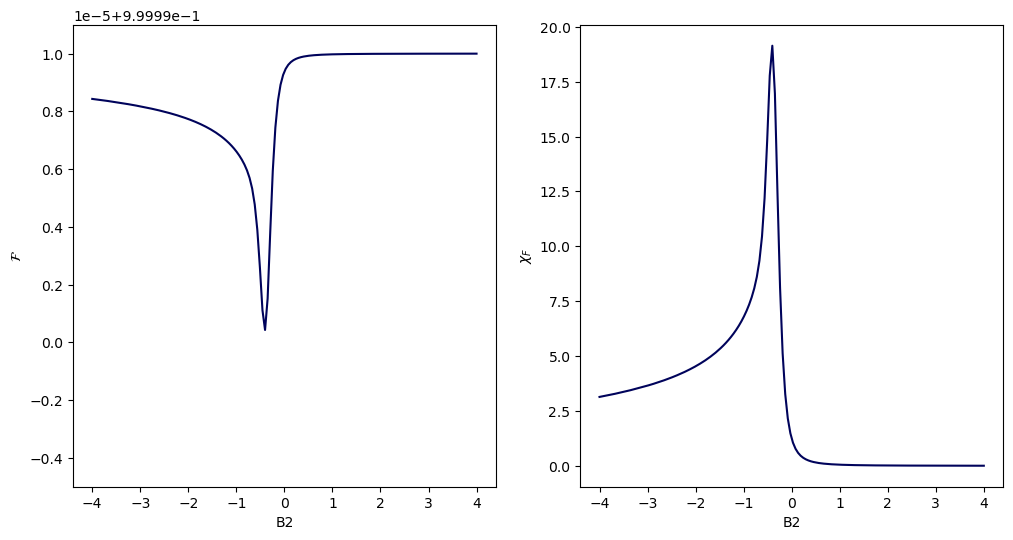

In [353]:
# Plot density of states as a function of energy level
figure, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(B2_range, fidelities2 , c='xkcd:dark blue')
ax[0].set_xlabel('B2')
ax[0].set_ylabel('$\mathcal{F}$')
ax[0].set_ylim(0.999985,1.000001)

    
ax[1].plot(B2_range, susceptibilities2, c='xkcd:dark blue')
ax[1].set_xlabel('B2')
ax[1].set_ylabel('$\chi_F$')
    
plt.show()

In [325]:
# Parameters
#M = 10    # Number of states
k = 10000
B2_range = np.linspace(-4, 4, 300)  # Range of B1 values to plot

susceptB2 = []
# Calculate 
for B2_val in B2_range:
    # Calculate 
    Ho = hamiltonian_matrix(1000,0,B2_val,B3,k,np.sqrt(2)) 
    eigvals, eigvecs = np.linalg.eigh(Ho)
    eigvec_gs = eigvecs[:, 0]
    energy_gs = eigvals[0]

    x = np.linspace(-5,5, len(eigvec_gs))
    
    vec = x * eigvec_gs 
    
    chi_F = 0.0
    for i in range(1,len(x)):
        num = (np.abs(np.vdot(eigvecs[:,i],vec)))**2
        den = (eigvals[i]-energy_gs)**2
        chi_F += num/den
        
    susceptB2.append(chi_F)

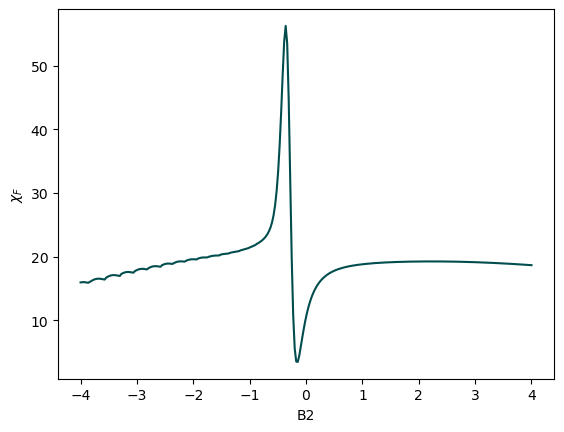

In [326]:
plt.plot(B2_range, susceptB2, c='xkcd:dark blue')


plt.xlabel('B2')
plt.ylabel('$\chi_F$')
plt.show()

# Husimi Function
$$ H_F(x, p) = \frac{1}{b\sqrt{2\pi}} \left| \int \frac{dq}{\sqrt{2\pi\hbar}} \Psi(q) \exp\left(-\frac{(x - q)^2}{4b^2} + i\frac{pq}{\hbar}\right) \right|^2 $$

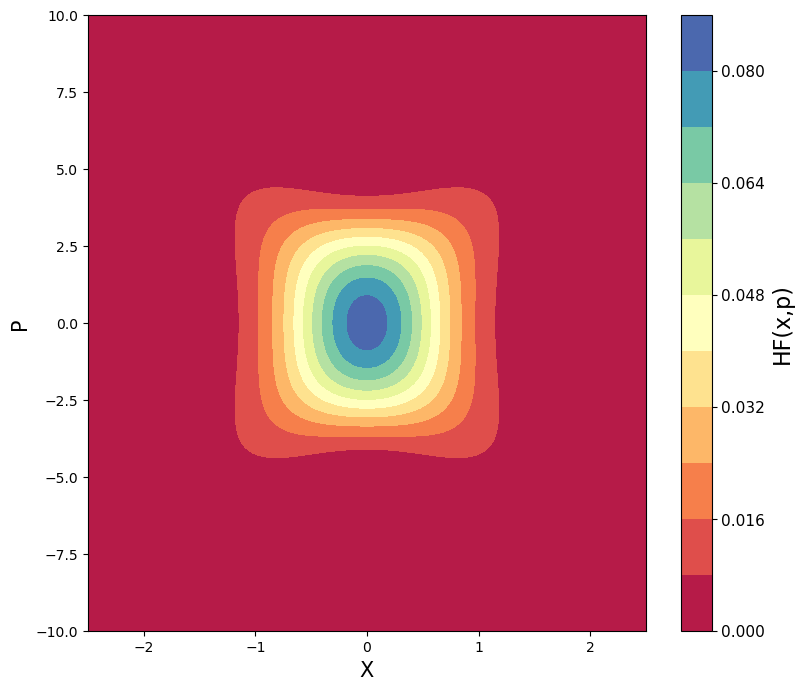

In [99]:
def husimi(psi, x, p):
    H = np.zeros((len(x), len(p))) 
    q = np.linspace(-7, 7, len(x)) #very sensitive to this

    for i, ip in enumerate(p):
        for j, ix in enumerate(x):
            integral = np.trapz(psi * np.exp(-(ix - q) ** 2 + 1j * ip * q), q)
            H[i, j] = (1/np.sqrt(2*np.pi)**3)*np.abs(integral) ** 2

    return H


# Define the arrays x, p, and psi
x = np.linspace(-2.5, 2.5, 200)
p = np.linspace(-10, 10, 200)
psi = calculate_psi(n,conv_eigvecs,x*xi)
psi = np.array(psi)

level = 52 # n
# Calculte the Husimi distribution
H = husimi(psi[level,:], x*xi, p)


# Plot the Husimi distribution
plt.figure(figsize=(9, 8)) 
contour = plt.contourf(x, p, H, levels=10, cmap='Spectral')
cbar = plt.colorbar(contour)
cbar.set_label('HF(x,p)', fontsize=16) 
cbar.ax.tick_params(labelsize=11)  
plt.xlabel('X', fontsize=15)
plt.ylabel('P', fontsize=15)
#plt.title('Husimi Distribution')
plt.show()

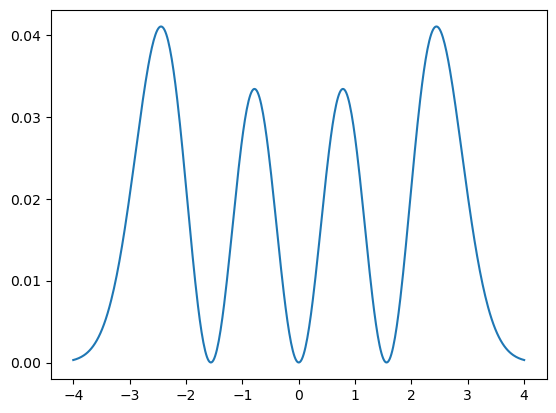

In [249]:
plt.plot(x, H[250,:])


# Wigner Function
$$ W_F(x, p) = \int \frac{dq}{2\pi\hbar} \exp\left(\frac{i}{\hbar}pq\right) \Psi^*\left(x + \frac{q}{2}\right) \Psi\left(x - \frac{q}{2}\right) $$

In [100]:
def wigner(n, evecs, x, p):
    W = np.zeros((len(x), len(p)))
    q = np.linspace(-10, 10, len(x))

    # Truncar evecs si tiene más de 250 filas
    if len(evecs[:, n]) > 250:
        evecs = evecs[:250, :]

    for i, ix in enumerate(x):
        psi_plus = np.zeros_like(q, dtype=complex)  # Inicializar psi_plus
        psi_minus = np.zeros_like(q, dtype=complex)  # Inicializar psi_minus

        # Calcular psi_plus y psi_minus
        for k in range(len(evecs[:, n])):
            psi_plus += evecs[k][n] * harmonic_oscillator_wf(ix + q/2, k)
            psi_minus += evecs[k][n] * harmonic_oscillator_wf(ix - q/2, k)

        # Calcular la transformada de Fourier para cada valor de p
        for j, ip in enumerate(p):
            W[i, j] = np.trapz(np.exp(-1j * ip * q) * np.conjugate(psi_plus) * psi_minus, q) / (2 * np.pi * k)

    return W

# Definir el rango y tamaño de paso para x y p
x = np.linspace(-4, 4, 500)
p = np.linspace(-10, 10, 500)

level = 52
# Calculate the Husimi distribution
W = wigner(level, conv_eigvecs, x/xi, p)



/tmp/ipykernel_6108/4194827170.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  W[i, j] = np.trapz(np.exp(-1j * ip * q) * np.conjugate(psi_plus) * psi_minus, q) / (2 * np.pi * k)


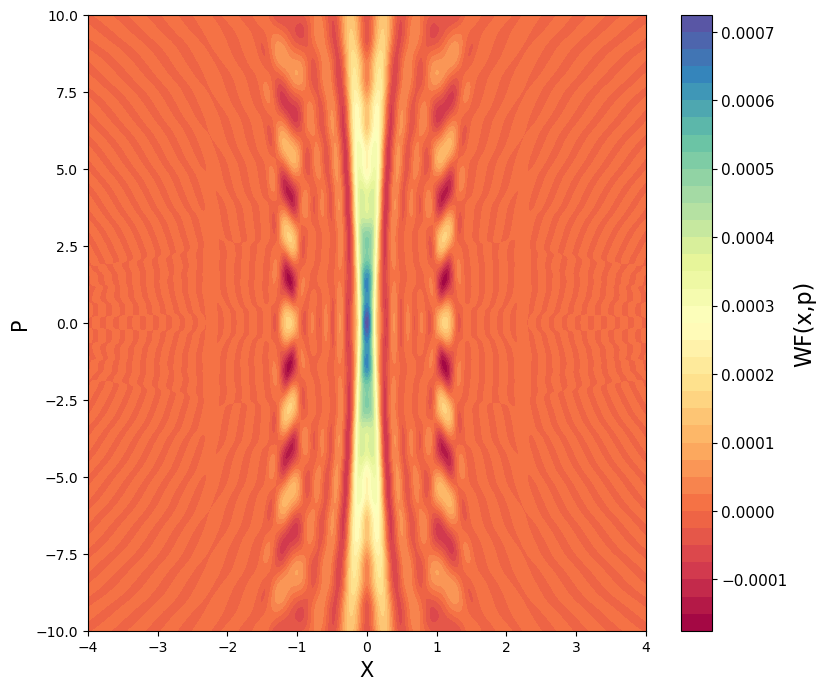

In [101]:
# Plot the Wigner distribution
plt.figure(figsize=(9, 8)) 
contour = plt.contourf(x, p, W.T, levels=40, cmap='Spectral')
cbar = plt.colorbar(contour)
cbar.set_label('WF(x,p)', fontsize=16) 
cbar.ax.tick_params(labelsize=11)  
plt.xlabel('X', fontsize=15)
plt.ylabel('P', fontsize=15)
#plt.title('Wigner Distribution')
plt.show()



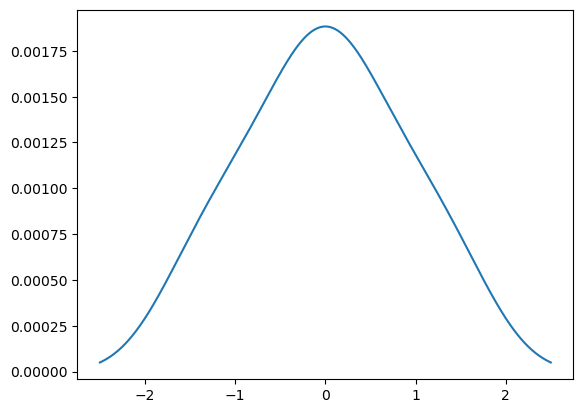

In [277]:
plt.plot(x, W[:,250])


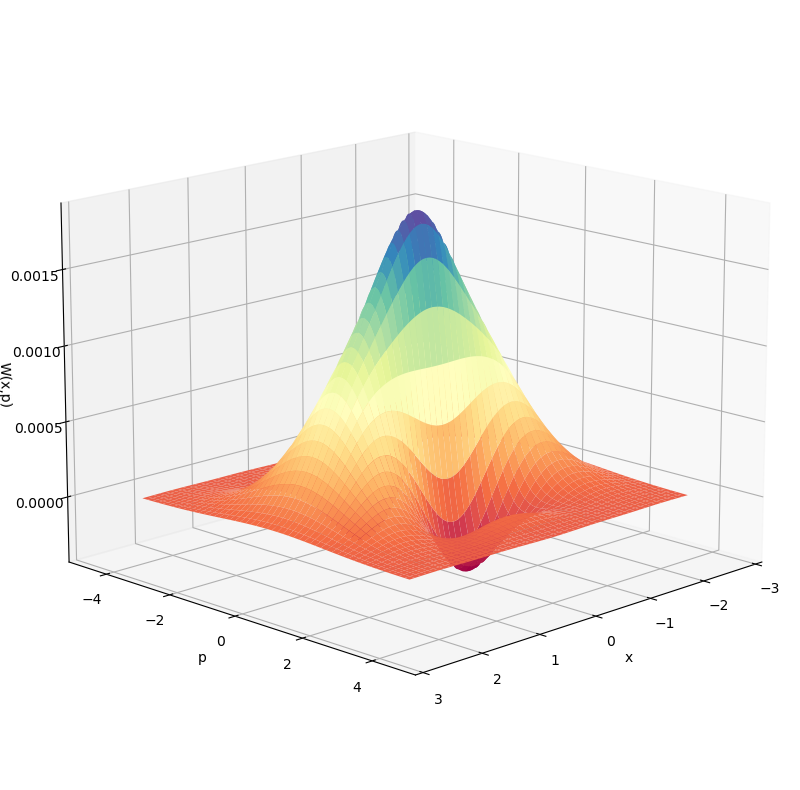

In [278]:
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid for x and p
X, P = np.meshgrid(x, p)

# Plot the Wigner distribution in 3D
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, P, W.T, cmap='Spectral')
ax.view_init(15, 45)
ax.set_xlabel('x')
ax.set_ylabel('p')
ax.set_zlabel('W(x,p)')
ax.set_xlim(-3,3)
ax.set_ylim(-5,5)
ax.set_zlim(np.min(W),np.max(W))
#ax.set_title('Wigner Distribution')

plt.show()